# 2D Ising Model
## Exact Solution

Exact solution of 2D Ising model on a square $m\times n$ lattice with periodic boundary conditions (torus). 
* Partition function.
* Energy per spin.
* Specific heat per spin.

We mainly follow the notations in Phys. Rev. 185, 832 (1969).

References:
* B. Kaufman, Phys. Rev. 76, 1232 (1949).
* A. E. Ferdinand and M. P. A. Fisher, Phys. Rev. 185, 832 (1969).
* Statistical Mechanics, Third Edition by R K Pathria and Paul D. Beale. (Ch 13.4)

In [1]:
import numpy as np
import pyuni10 as uni10
import matplotlib.pyplot as plt

In [2]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))
Kc = np.log(1+np.sqrt(2))/2

### $c$ function and its derivatives
The $c$ function is defined as: (Eq 2.4, PRB 1969)
$$
  c_r =\cosh(2K)\coth(2K) - \cos\left(\frac{r \pi}{n}\right) 
  = \frac{\cosh(2K)^2}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right)
  = \sinh(2K) + \frac{1}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right).
$$

The first and second deratives of $c_r$ are: (they are independent of $r$ so we can drop the subscript.)

$$
\DeclareMathOperator{\csch}{csch}
  c^\prime = c^\prime_r = \cosh(2K)[4-2\csch^2(2K)] = 2 \cosh(2K)\left(1-\frac{1}{\sinh(2K)^2}\right).
$$

$$
  c^{\prime\prime} = c^{\prime\prime}_r = 8\csch(2K)^3 \cosh(2K)^2+4(\sinh(2K)-\csch(2K))
  =  \frac{8\cosh(2K)^2}{\sinh(2K)^3} + 4\left( \sinh(2K) - \frac{1}{\sinh(2K)} \right).
$$

In [3]:
# c_0, c_r and its derivatives
def c_0(K):
    return np.sinh(2*K) + 1/np.sinh(2*K) - 1

def eval_c(n, K):
    c = np.zeros((2*n, K.size))
    for r in range(2*n):
        c[r, :] = np.sinh(2*K) + 1/np.sinh(2*K) - np.cos(np.pi*r/n)
    return c

def eval_d_c(K):
    return 2*np.cosh(2*K)*(1-1/(np.sinh(2*K)**2))

def eval_dd_c(K):
    return 8*(np.cosh(2*K)**2)/(np.sinh(2*K)**3) + 4*(np.sinh(2*K) - 1/np.sinh(2*K))

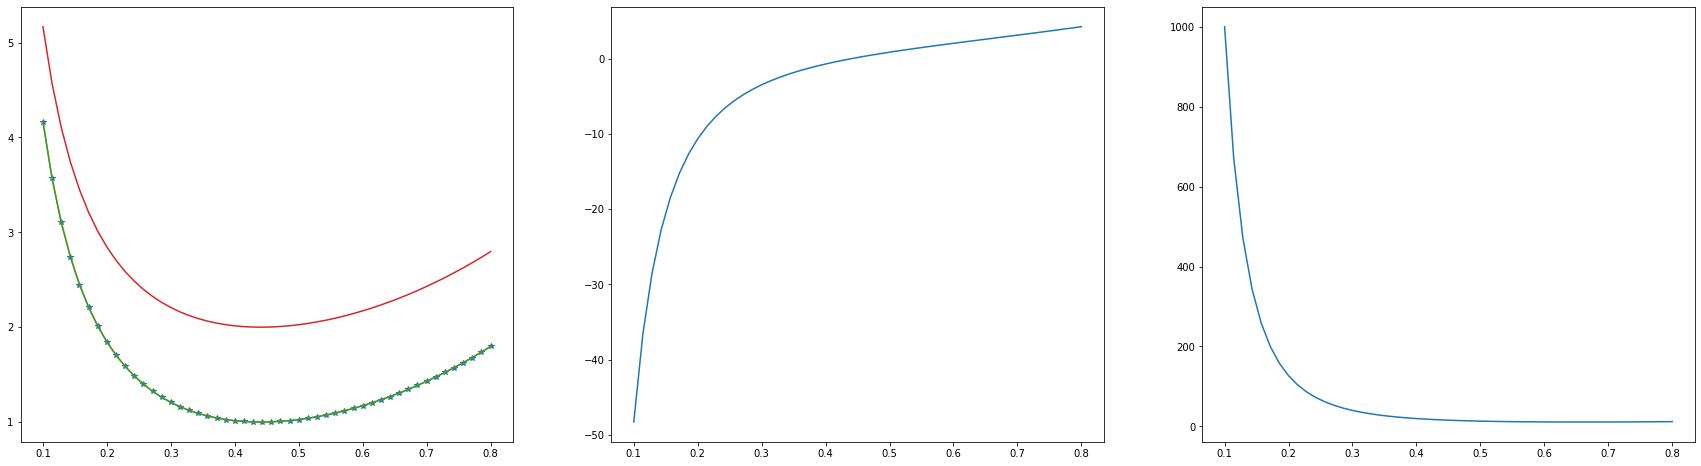

In [4]:
# test c-function
K = np.linspace(0.1, 0.8)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10*3,8))
n = 1024
m = n

c0 = c_0(K)
c = eval_c(n, K)
d_c = eval_d_c(K)
dd_c = eval_dd_c(K)

ax[0].plot(K, c0,'*')
ax[0].plot(K, c[0])
ax[0].plot(K, c[1])
ax[0].plot(K, c[n//2])
ax[1].plot(K, d_c)
ax[2].plot(K, dd_c)

### $\gamma$ function and its derivatives
$\gamma$ and $c$ related by the equation $\cosh(\gamma_l)=c_l$, (Eq 2.4, PRB 1969) so that
$$ 
  \gamma_0 = 2K + \ln(\tanh(K)). 
$$
$$ 
  \gamma_r  =\text{arccosh}(c_r) = \ln \left( c_r + (c^2_r-1)^{1/2} \right), l \neq 0. 
$$
Note that there are sign ambituity. The equations above are the correct choices. 
For example one **should not** choose $\gamma_0 = \ln \left( c_0 + (c^2_0-1)^{1/2} \right)$. c.f. Fig3 of Phys. Rev. 76, 1232 (1949).

Note that $\gamma_l = \gamma_{2n-l}$ and for $0\le l\le n$ the function $\gamma_l$ is monotonically increasing in $l$.

In [5]:
# gamma and its derivatives
def eval_gamma(n, K):
    c = eval_c(n, K)
    gamma = np.zeros((2*n, K.size))

    gamma[0, :] = 2*K + np.log(np.tanh(K))
    gamma[1:, :] = np.arccosh(c[1:, :])
    return gamma

def eval_d_gamma(n, K):
    c = eval_c(n, K)
    d_c = eval_d_c(K)

    d_gamma = np.zeros((2*n, K.size))
    d_gamma[0, :] = 2*(1.0 + 1.0/np.sinh(2*K))
    d_gamma[1:, :] = d_c[:]*(c[1:,:]**2-1)**(-1/2)

    return d_gamma

def eval_dd_gamma(n, K):
    c = eval_c(n, K)
    d_c = eval_d_c(K)
    dd_c = eval_dd_c(K)

    dd_gamma = np.zeros((2*n, K.size))  
    dd_gamma[0, :] = -4*np.cosh(2*K)/(np.sinh(2*K)**2)
    dd_gamma[1:, :] = dd_c[:] * (c[1:, :]**2-1)**(-1/2) - c[1:,:]*(d_c[:]**2) * (c[1:,:]**2-1)**(-3/2)
    return dd_gamma

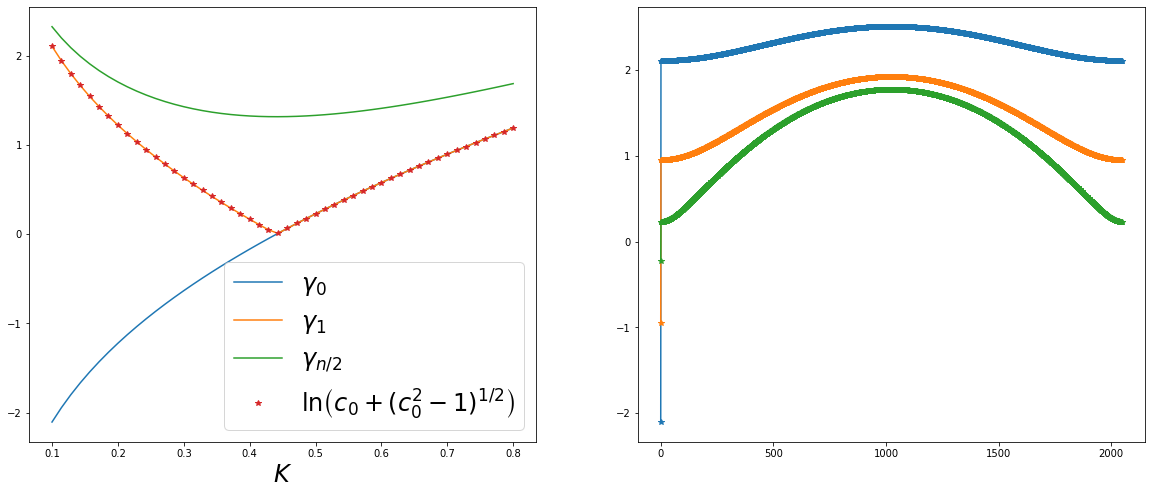

In [6]:
# test gamma-function
K = np.linspace(0.1, 0.8)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10*2,8))
n = 1024
m = n

c = eval_c(n, K)
gamma = eval_gamma(n, K)

# for i in range(n):
#     ax[0].plot(K, gamma[i])
ax[0].plot(K, gamma[0], label=r'$\gamma_0$')
ax[0].plot(K, gamma[1], label=r'$\gamma_1$')
ax[0].plot(K, gamma[n//2], label=r'$\gamma_{n/2}$')    
ax[0].plot(K, np.arccosh(c[0, :]), '*', label=r'$\ln \left( c_0 + (c^2_0-1)^{1/2} \right)$')
ax[0].set_xlabel(r'$K$', fontsize=24)
ax[0].legend(fontsize=24)

ax[1].plot(range(2*n), gamma[0:2*n, 0], '*-')
ax[1].plot(range(2*n), gamma[0:2*n, 10], '*-')
ax[1].plot(range(2*n), gamma[0:2*n, 20], '*-')

### $Z_1, Z_2, Z_3, Z_4$
The canonical partition function reads:
$$
  Z(K) = \frac{1}{2} \left(2\sinh(2K)\right)^{mn/2} (Z_1(K) + Z_2(K) + Z_3(K) + Z_4(K)),
$$
where
$$ Z_1(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r+1}), \; Z_2(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r+1}), $$
$$ Z_3(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r1}), \; Z_4(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r1}). $$

Note that $Z_4$ changes sign at critical point. $Z_1, Z_2, Z_3$ are alwayas positive. 

In [7]:
# Z1, Z2, Z3, Z4
def eval_Z1(m, gamma):
    return np.prod(2*np.cosh(m*gamma[1::2,:]/2), axis=0)

def eval_Z2(m, gamma):
    return np.prod(2*np.sinh(m*gamma[1::2,:]/2), axis=0)

def eval_Z3(m, gamma):
    return np.prod(2*np.cosh(m*gamma[0::2,:]/2), axis=0)

def eval_Z4(m, gamma):
    return np.prod(2*np.sinh(m*gamma[0::2,:]/2), axis=0)

Text(0.5, 0, '$K$')

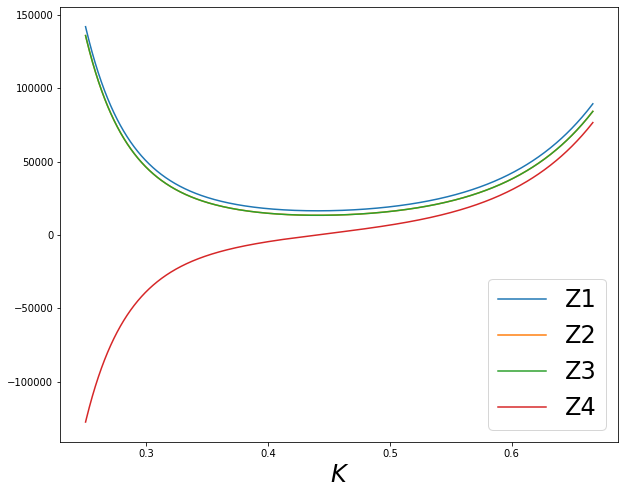

In [8]:
T = np.linspace(1.5, 4,1000)
K = 1/T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
n = 4
m = n

gamma = eval_gamma(n, K)

Z1 = eval_Z1(m,gamma)
Z2 = eval_Z2(m,gamma)
Z3 = eval_Z3(m,gamma)
Z4 = eval_Z4(m,gamma)

ax.plot(K, Z1, label='Z1')
ax.plot(K, Z2, label='Z2')
ax.plot(K, Z3, label='Z3')
ax.plot(K, Z4, label='Z4')
ax.legend(fontsize=24)
ax.set_xlabel(r'$K$', fontsize=24)

### $\ln(Z_1), \frac{Z_2}{Z_1}, \frac{Z_3}{Z_1}, \frac{Z_4}{Z_1}$

$$ \ln[Z_1(K)] = \sum_{r=0}^{n-1} \log[2\cosh(\frac{m}{2} \gamma_{2r+1})] $$

$$
  \frac{Z_2}{Z_1} = \sum_{r=0}^{n-1} \frac{\sinh(\frac{m}{2}\gamma_{2r+1})}{\cosh(\frac{m}{2}\gamma_{2r+1})}, \;
  \frac{Z_3}{Z_1} = \sum_{r=0}^{n-1} \frac{\cosh(\frac{m}{2}\gamma_{2r})}{\cosh(\frac{m}{2}\gamma_{2r+1})}, \;
  \frac{Z_4}{Z_1} = \sum_{r=0}^{n-1} \frac{\sinh(\frac{m}{2}\gamma_{2r})}{\cosh(\frac{m}{2}\gamma_{2r+1})}.
$$

In [9]:
def eval_lnZ1(K, n, m, gamma):
    lnZ1 = 0.0
    for r in range(n):
        lnZ1 = lnZ1 + np.log(2*np.cosh(m*gamma[2*r+1]/2))
    return lnZ1

def eval_Z2_over_Z1(m, gamma, K):
    return np.prod(np.sinh(m*gamma[1::2,:]/2)/np.cosh(m*gamma[1::2,:]/2), axis=0)

def eval_Z3_over_Z1(m, gamma, K):
    return np.prod(np.cosh(m*gamma[0::2,:]/2)/np.cosh(m*gamma[1::2,:]/2), axis=0)

def eval_Z4_over_Z1(m, gamma, K):
    return np.prod(np.sinh(m*gamma[0::2,:]/2)/np.cosh(m*gamma[1::2,:]/2), axis=0)

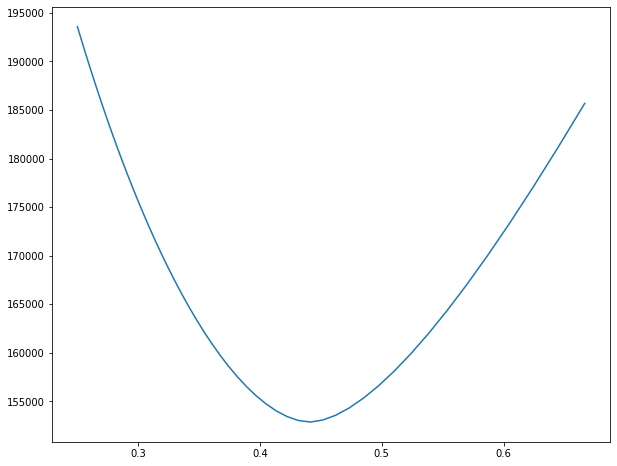

In [10]:
T = np.linspace(1.5, 4)
K = 1/T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
n = 512
m = n

gamma = eval_gamma(n, K)
lnZ1 = eval_lnZ1(K, n, m, gamma)
ax.plot(K, lnZ1)

Text(0.5, 0, '$K$')

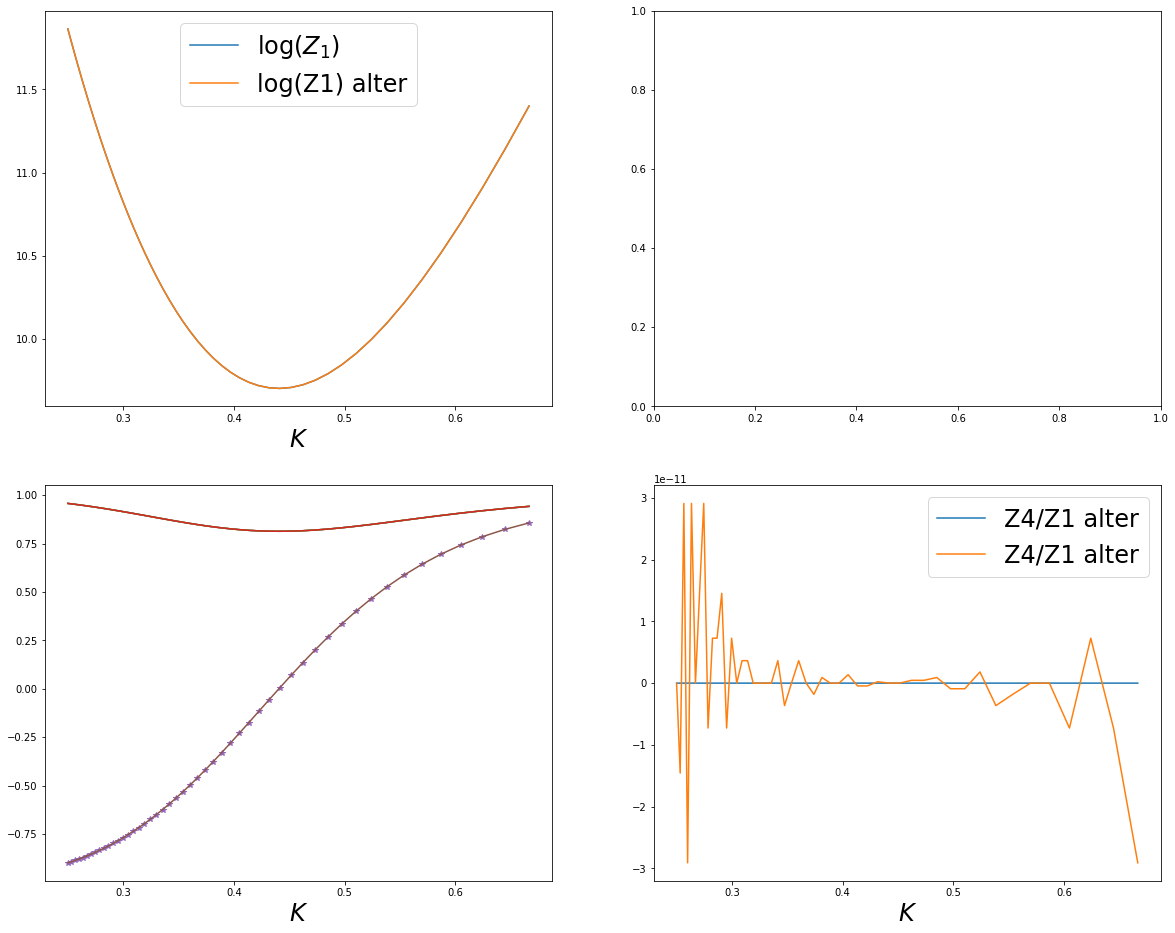

In [11]:
T = np.linspace(1.5, 4)
K = 1/T

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10*2,8*2))
n = 4
m = n

gamma = eval_gamma(n, K)

Z1 = eval_Z1(m,gamma)
Z2 = eval_Z2(m,gamma)
Z3 = eval_Z3(m,gamma)
Z4 = eval_Z4(m,gamma)

lnZ1 = eval_lnZ1(K, n, m, gamma)
Z2_over_Z1 = eval_Z2_over_Z1(m, gamma, K)
Z3_over_Z1 = eval_Z3_over_Z1(m, gamma, K)
Z4_over_Z1 = eval_Z4_over_Z1(m, gamma, K)

ax[0,0].plot(K, np.log(Z1), label=r'$\log(Z_1)$')
ax[0,0].plot(K, lnZ1, label='log(Z1) alter')
ax[0,0].legend(fontsize=24)
ax[0,0].set_xlabel(r'$K$', fontsize=24)

ax[1,0].plot(K, Z2/Z1, label='Z2')
ax[1,0].plot(K, Z2_over_Z1, label='Z2/Z1 alter')
ax[1,0].plot(K, Z3/Z1, label='Z3')
ax[1,0].plot(K, Z3_over_Z1, label='Z3/Z1 alter')
ax[1,0].plot(K, Z4/Z1, '*', label='Z4')
ax[1,0].plot(K, Z4_over_Z1, label='Z4/Z1 alter')
ax[1,0].set_xlabel(r'$K$', fontsize=24)

ax[1,1].plot(K, Z4_over_Z1-Z4/Z1, label='Z4/Z1 alter')
ax[1,1].plot(K, Z4_over_Z1*Z1-Z4, label='Z4/Z1 alter')
ax[1,1].legend(fontsize=24)
ax[1,1].set_xlabel(r'$K$', fontsize=24)

### $\log(Z)$
The log of the partition function reads:
$$
  \frac{\ln Z}{mn}=  \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) + \ln(Z1(K)+Z2(K)+Z3(K)+Z4(K)),
$$
or
$$
  \frac{\ln Z}{mn} = \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) 
  + \ln(Z1(K))
  + \ln\left[ 1+ \frac{Z2(K)}{Z1(K)}+\frac{Z3(K)}{Z1(K)}+\frac{Z4(K)}{Z1(K)} \right].
$$

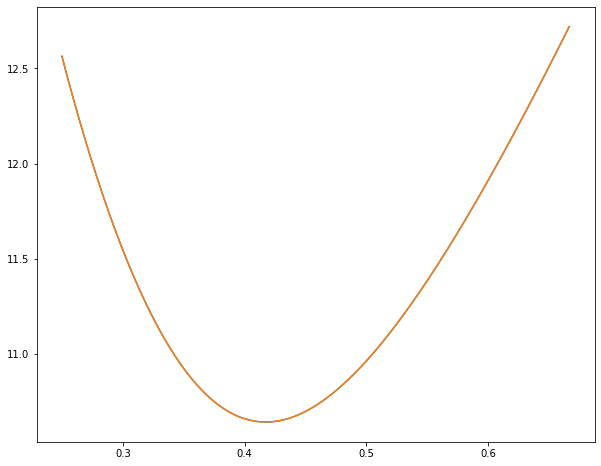

In [12]:
T = np.linspace(1.5, 4,1000)
K = 1/T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10*1,8))
n = 4
m = n

gamma = eval_gamma(n, K)

Z1 = eval_Z1(m,gamma)
Z2 = eval_Z2(m,gamma)
Z3 = eval_Z3(m,gamma)
Z4 = eval_Z4(m,gamma)

lnZ1 = eval_lnZ1(K, n, m, gamma)
Z2_over_Z1 = eval_Z2_over_Z1(m, gamma, K)
Z3_over_Z1 = eval_Z3_over_Z1(m, gamma, K)
Z4_over_Z1 = eval_Z4_over_Z1(m, gamma, K)

lnZ = np.log(Z1+Z2+Z3+Z4)
lnZ_alter = lnZ1 + np.log(1+Z2_over_Z1+Z3_over_Z1+Z4_over_Z1)
ax.plot(K, lnZ)
ax.plot(K, lnZ_alter)

### $\frac{Z^\prime_1}{Z_1}, \frac{Z^\prime_2}{Z_2}, \frac{Z^\prime_3}{Z_3}, \frac{Z^\prime_4}{Z_4}$

$$ 
  \frac{Z^\prime_1}{Z_1} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right), \;
  \frac{Z^\prime_2}{Z_2} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right).
$$

$$
  \frac{Z^\prime_3}{Z_3} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right), \;
  \frac{Z^\prime_4}{Z_4} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right).
$$



In [13]:
def eval_dZ1_over_Z1(m, gamma, d_gamma, K):
    return np.sum(d_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2

def eval_dZ2_over_Z2(m, gamma, d_gamma, K):
    return np.sum(d_gamma[1::2,:]/np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2

def eval_dZ3_over_Z3(m, gamma, d_gamma, K):
    return np.sum(d_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2

def eval_dZ4_over_Z4(m, gamma, d_gamma, K):
    return np.sum(d_gamma[0::2,:]/np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2

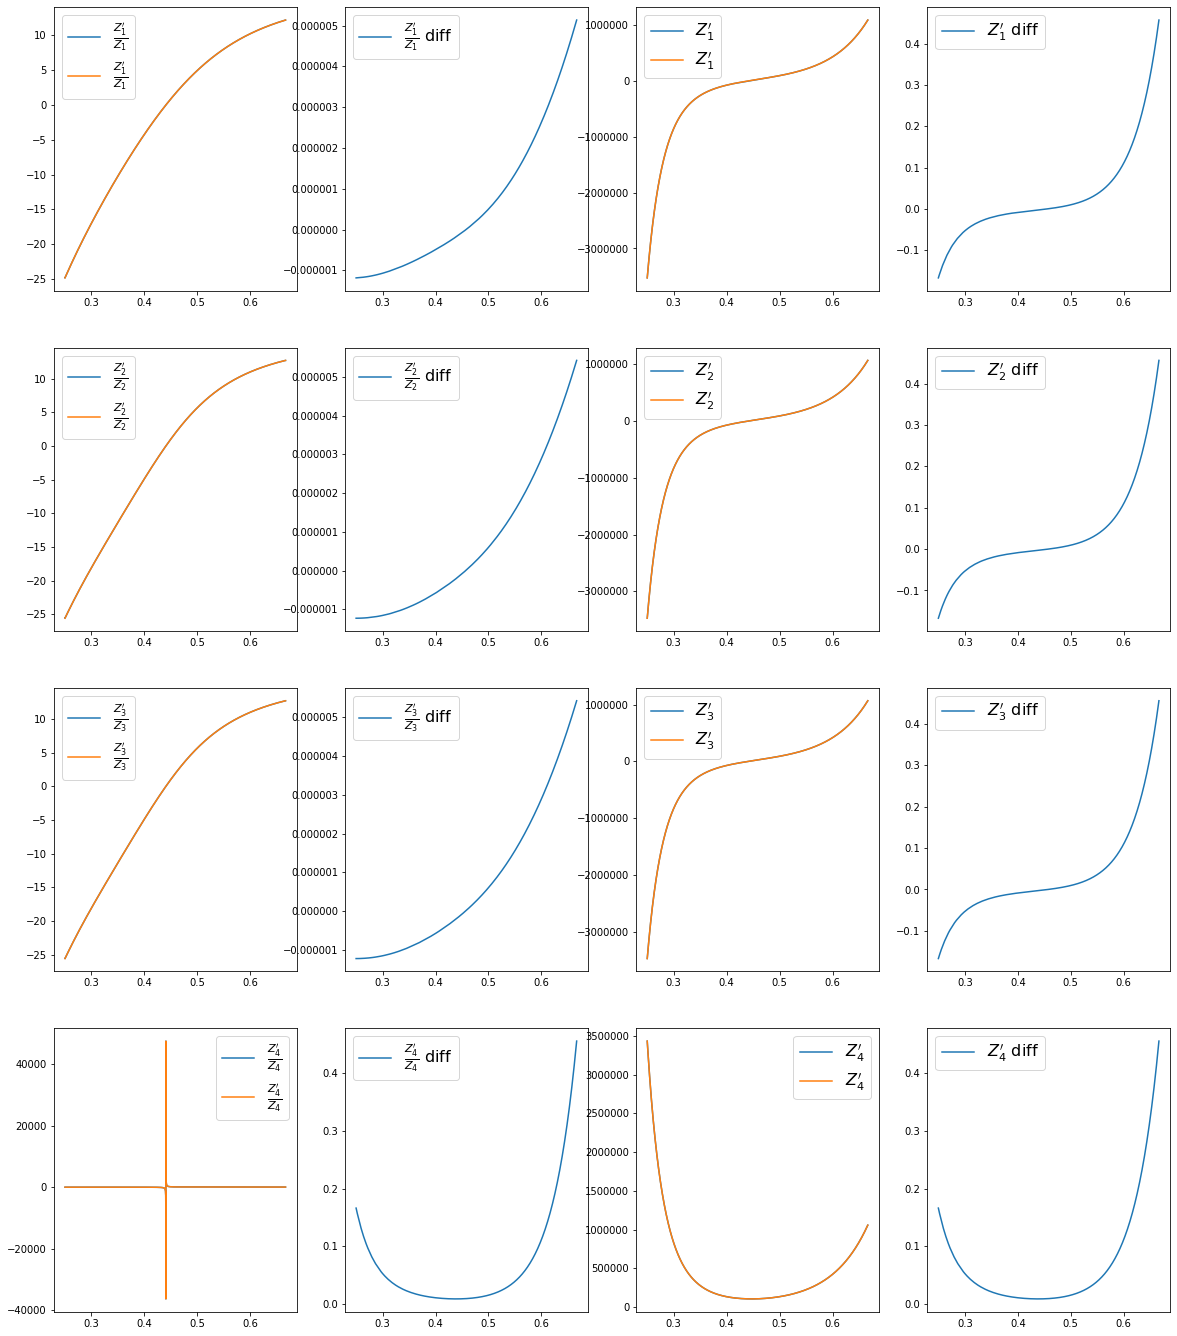

In [14]:
T = np.linspace(1.5, 4, 10000)
K = 1/T

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10*2,6*4))
n = 4
m = n

gamma = eval_gamma(n, K)

Z1 = eval_Z1(m,gamma)
Z2 = eval_Z2(m,gamma)
Z3 = eval_Z3(m,gamma)
Z4 = eval_Z4(m,gamma)

dZ1 = np.gradient(Z1, K)
dZ2 = np.gradient(Z2, K)
dZ3 = np.gradient(Z3, K)
dZ4 = np.gradient(Z4, K)

d_gamma = eval_d_gamma(n, K)
dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)

legend_size = 16

# dZ1/Z1
ax[0,0].plot(K, dZ1/Z1, label=r'$\frac{Z^\prime_1}{Z_1}$')
ax[0,0].plot(K, dZ1_over_Z1, label=r'$\frac{Z^\prime_1}{Z_1}$')
ax[0,1].plot(K[1:-1], dZ1[1:-1]/Z1[1:-1]-dZ1_over_Z1[1:-1], label=r'$\frac{Z^\prime_1}{Z_1}$ diff')
ax[0,2].plot(K, dZ1, label=r'$Z^\prime_1$')
ax[0,2].plot(K, dZ1_over_Z1*Z1, label=r'$Z^\prime_1$')
ax[0,3].plot(K[1:-1], dZ1[1:-1]-dZ1_over_Z1[1:-1]*Z1[1:-1], label=r'$Z^\prime_1$ diff')
ax[0,0].legend(fontsize=legend_size)
ax[0,1].legend(fontsize=legend_size)
ax[0,2].legend(fontsize=legend_size)
ax[0,3].legend(fontsize=legend_size)

# dZ2/Z2
ax[1,0].plot(K, dZ2/Z2, label=r'$\frac{Z^\prime_2}{Z_2}$')
ax[1,0].plot(K, dZ2_over_Z2, label=r'$\frac{Z^\prime_2}{Z_2}$')
ax[1,1].plot(K[1:-1], dZ2[1:-1]/Z2[1:-1]-dZ2_over_Z2[1:-1], label=r'$\frac{Z^\prime_2}{Z_2}$ diff')
ax[1,2].plot(K, dZ2, label=r'$Z^\prime_2$')
ax[1,2].plot(K, dZ2_over_Z2*Z2, label=r'$Z^\prime_2$')
ax[1,3].plot(K[1:-1], dZ2[1:-1]-dZ2_over_Z2[1:-1]*Z2[1:-1], label=r'$Z^\prime_2$ diff')
ax[1,0].legend(fontsize=legend_size)
ax[1,1].legend(fontsize=legend_size)
ax[1,2].legend(fontsize=legend_size)
ax[1,3].legend(fontsize=legend_size)

# dZ3/Z3
ax[2,0].plot(K, dZ3/Z3, label=r'$\frac{Z^\prime_3}{Z_3}$')
ax[2,0].plot(K, dZ3_over_Z3, label=r'$\frac{Z^\prime_3}{Z_3}$')
ax[2,1].plot(K[1:-1], dZ3[1:-1]/Z3[1:-1]-dZ3_over_Z3[1:-1], label=r'$\frac{Z^\prime_3}{Z_3}$ diff')
ax[2,2].plot(K, dZ3, label=r'$Z^\prime_3$')
ax[2,2].plot(K, dZ3_over_Z3*Z3, label=r'$Z^\prime_3$')
ax[2,3].plot(K[1:-1], dZ3[1:-1]-dZ3_over_Z3[1:-1]*Z3[1:-1], label=r'$Z^\prime_3$ diff')
ax[2,0].legend(fontsize=legend_size)
ax[2,1].legend(fontsize=legend_size)
ax[2,2].legend(fontsize=legend_size)
ax[2,3].legend(fontsize=legend_size)

# dZ4/Z4
ax[3,0].plot(K, dZ4/Z4, label=r'$\frac{Z^\prime_4}{Z_4}$')
ax[3,0].plot(K, dZ4_over_Z4, label=r'$\frac{Z^\prime_4}{Z_4}$')
ax[3,1].plot(K[1:-1], dZ4[1:-1]-dZ4_over_Z4[1:-1]*Z4[1:-1], label=r'$\frac{Z^\prime_4}{Z_4}$ diff')
ax[3,2].plot(K, dZ4, label=r'$Z^\prime_4$')
ax[3,2].plot(K, dZ4_over_Z4*Z4, label=r'$Z^\prime_4$')
ax[3,3].plot(K[1:-1], dZ4[1:-1]-dZ4_over_Z4[1:-1]*Z4[1:-1], label=r'$Z^\prime_4$ diff')
ax[3,0].legend(fontsize=legend_size)
ax[3,1].legend(fontsize=legend_size)
ax[3,2].legend(fontsize=legend_size)
ax[3,3].legend(fontsize=legend_size)

### $\frac{Z^{\prime\prime}_1}{Z_1}, \frac{Z^{\prime\prime}_2}{Z_2}, \frac{Z^{\prime\prime}_3}{Z_3}, \frac{Z^{\prime\prime}_4}{Z_4}$



$$
  \frac{Z^{\prime\prime}_1}{Z_1} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_2}{Z_2} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r+1} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_3}{Z_3} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_4}{Z_4} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right].
$$

In [15]:
def eval_ddZ1_over_Z1(m, gamma, d_gamma, dd_gamma, K):
    ddZ1_over_Z1 = (np.sum(d_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2)**2
    ddZ1_over_Z1 = ddZ1_over_Z1 + np.sum(
        dd_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2)+((d_gamma[1::2,:]/np.cosh(m*gamma[1::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ1_over_Z1

def eval_ddZ2_over_Z2(m, gamma, d_gamma, dd_gamma, K):
    ddZ2_over_Z2 = (np.sum(d_gamma[1::2,:]/np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2)**2
    ddZ2_over_Z2 = ddZ2_over_Z2 + np.sum(
        dd_gamma[1::2,:]/np.tanh(m*gamma[1::2,:]/2)-((d_gamma[1::2,:]/np.sinh(m*gamma[1::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ2_over_Z2

def eval_ddZ3_over_Z3(m, gamma, d_gamma, dd_gamma, K):
    ddZ3_over_Z3 = (np.sum(d_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2)**2
    ddZ3_over_Z3 = ddZ3_over_Z3 + np.sum(
        dd_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2)+((d_gamma[0::2,:]/np.cosh(m*gamma[0::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ3_over_Z3

def eval_ddZ4_over_Z4(m, gamma, d_gamma, dd_gamma, K):
    ddZ4_over_Z4 = (np.sum(d_gamma[0::2,:]/np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2)**2
    ddZ4_over_Z4 = ddZ4_over_Z4 + np.sum(
        dd_gamma[0::2,:]/np.tanh(m*gamma[0::2,:]/2)-((d_gamma[0::2,:]/np.sinh(m*gamma[0::2,:]/2))**2)*m/2, axis=0)*m/2
    return ddZ4_over_Z4

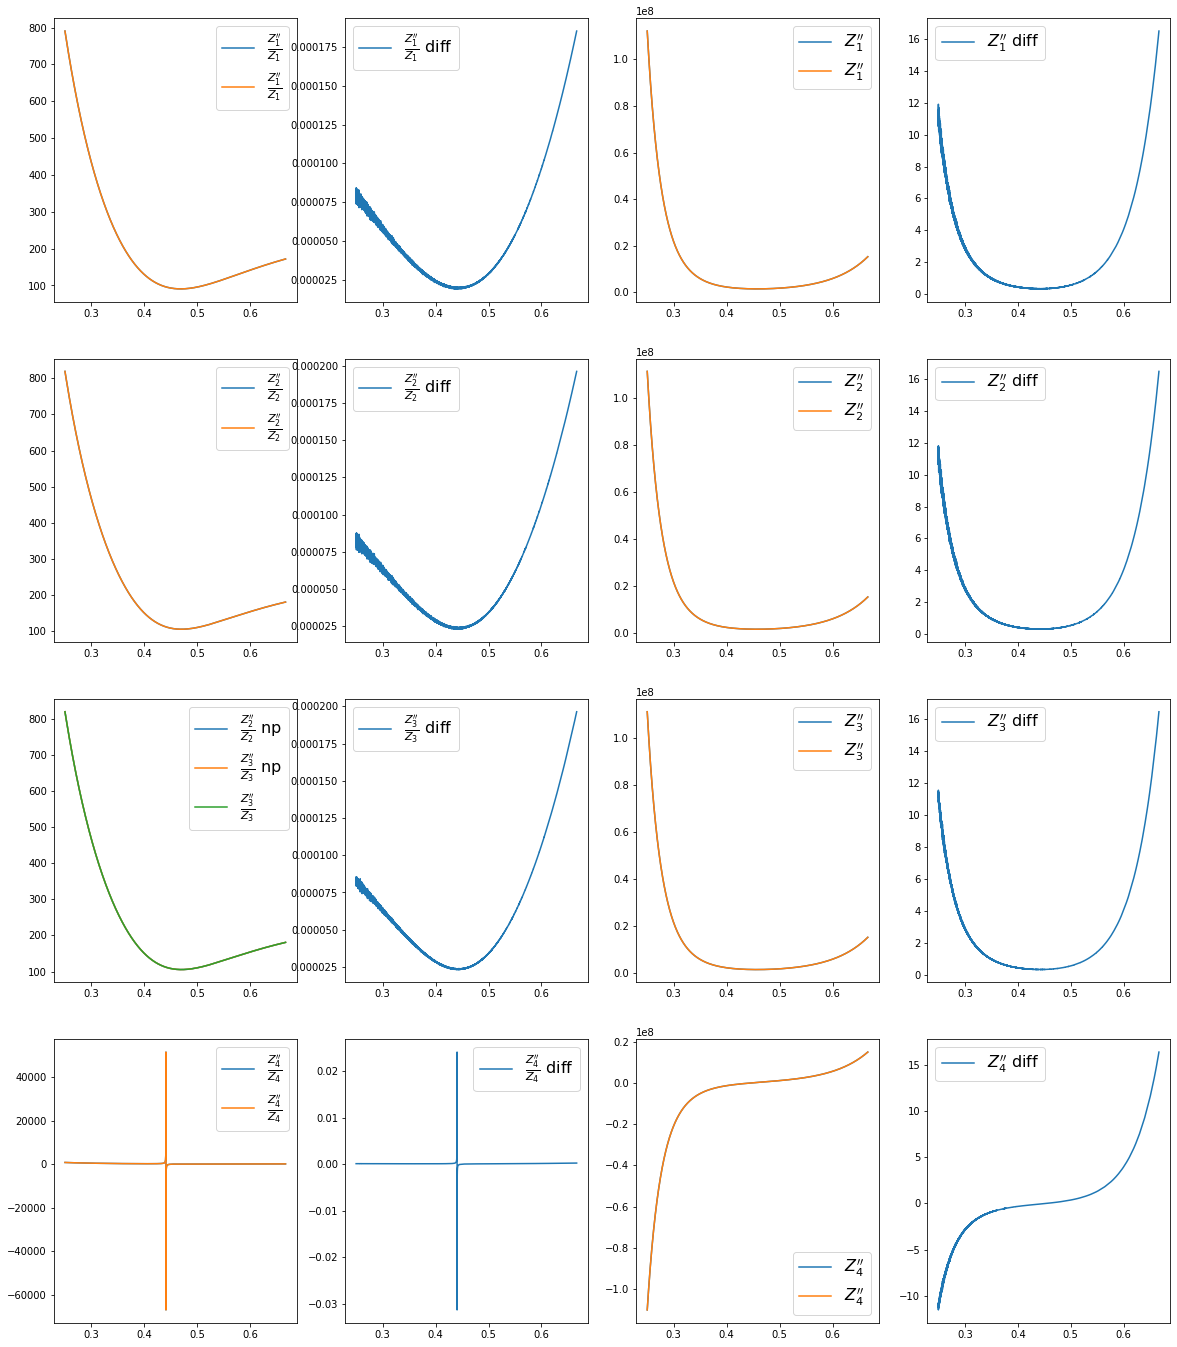

In [16]:
T = np.linspace(1.5, 4, 10000)
K = 1/T

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10*2,6*4))
n = 4
m = n

gamma = eval_gamma(n, K)

Z1 = eval_Z1(m,gamma)
Z2 = eval_Z2(m,gamma)
Z3 = eval_Z3(m,gamma)
Z4 = eval_Z4(m,gamma)

dZ1 = np.gradient(Z1, K)
dZ2 = np.gradient(Z2, K)
dZ3 = np.gradient(Z3, K)
dZ4 = np.gradient(Z4, K)

ddZ1 = np.gradient(dZ1, K)
ddZ2 = np.gradient(dZ2, K)
ddZ3 = np.gradient(dZ3, K)
ddZ4 = np.gradient(dZ4, K)

d_gamma = eval_d_gamma(n, K)
dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)

dd_gamma = eval_dd_gamma(n, K)
ddZ1_over_Z1 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
ddZ2_over_Z2 = eval_ddZ2_over_Z2(m,gamma,d_gamma,dd_gamma,K)
ddZ3_over_Z3 = eval_ddZ3_over_Z3(m,gamma,d_gamma,dd_gamma,K)
ddZ4_over_Z4 = eval_ddZ4_over_Z4(m,gamma,d_gamma,dd_gamma,K)

legend_size = 16

# ddZ1/Z1
ax[0,0].plot(K[2:-2], ddZ1[2:-2]/Z1[2:-2], label=r'$\frac{Z^{\prime\prime}_1}{Z_1}$')
ax[0,0].plot(K[2:-2], ddZ1_over_Z1[2:-2], label=r'$\frac{Z^{\prime\prime}_1}{Z_1}$')
ax[0,1].plot(K[2:-2], ddZ1[2:-2]/Z1[2:-2]-ddZ1_over_Z1[2:-2], label=r'$\frac{Z^{\prime\prime}_1}{Z_1}$ diff')
ax[0,2].plot(K[2:-2], ddZ1[2:-2], label=r'$Z^{\prime\prime}_1$')
ax[0,2].plot(K[2:-2], ddZ1_over_Z1[2:-2]*Z1[2:-2], label=r'$Z^{\prime\prime}_1$')
ax[0,3].plot(K[2:-2], ddZ1[2:-2]-ddZ1_over_Z1[2:-2]*Z1[2:-2], label=r'$Z^{\prime\prime}_1$ diff')
ax[0,0].legend(fontsize=legend_size)
ax[0,1].legend(fontsize=legend_size)
ax[0,2].legend(fontsize=legend_size)
ax[0,3].legend(fontsize=legend_size)

# ddZ2/Z2
ax[1,0].plot(K[2:-2], ddZ2[2:-2]/Z2[2:-2], label=r'$\frac{Z^{\prime\prime}_2}{Z_2}$')
ax[1,0].plot(K[2:-2], ddZ2_over_Z2[2:-2], label=r'$\frac{Z^{\prime\prime}_2}{Z_2}$')
ax[1,1].plot(K[2:-2], ddZ2[2:-2]/Z2[2:-2]-ddZ2_over_Z2[2:-2], label=r'$\frac{Z^{\prime\prime}_2}{Z_2}$ diff')
ax[1,2].plot(K[2:-2], ddZ2[2:-2], label=r'$Z^{\prime\prime}_2$')
ax[1,2].plot(K[2:-2], ddZ2_over_Z2[2:-2]*Z2[2:-2], label=r'$Z^{\prime\prime}_2$')
ax[1,3].plot(K[2:-2], ddZ2[2:-2]-ddZ2_over_Z2[2:-2]*Z2[2:-2], label=r'$Z^{\prime\prime}_2$ diff')
ax[1,0].legend(fontsize=legend_size)
ax[1,1].legend(fontsize=legend_size)
ax[1,2].legend(fontsize=legend_size)
ax[1,3].legend(fontsize=legend_size)

# ddZ3/Z3 # to be checked
ax[2,0].plot(K[2:-2], ddZ2[2:-2]/Z2[2:-2], label=r'$\frac{Z^{\prime\prime}_2}{Z_2}$ np')
ax[2,0].plot(K[2:-2], ddZ3[2:-2]/Z3[2:-2], label=r'$\frac{Z^{\prime\prime}_3}{Z_3}$ np')
ax[2,0].plot(K[2:-2], ddZ3_over_Z3[2:-2], label=r'$\frac{Z^{\prime\prime}_3}{Z_3}$')
ax[2,1].plot(K[2:-2], ddZ3[2:-2]/Z3[2:-2]-ddZ3_over_Z3[2:-2], label=r'$\frac{Z^{\prime\prime}_3}{Z_3}$ diff')
ax[2,2].plot(K[2:-2], ddZ3[2:-2], label=r'$Z^{\prime\prime}_3$')
ax[2,2].plot(K[2:-2], ddZ3_over_Z3[2:-2]*Z3[2:-2], label=r'$Z^{\prime\prime}_3$')
ax[2,3].plot(K[2:-2], ddZ3[2:-2]-ddZ3_over_Z3[2:-2]*Z3[2:-2], label=r'$Z^{\prime\prime}_3$ diff')
ax[2,0].legend(fontsize=legend_size)
ax[2,1].legend(fontsize=legend_size)
ax[2,2].legend(fontsize=legend_size)
ax[2,3].legend(fontsize=legend_size)

# ddZ4/Z4
ax[3,0].plot(K[2:-2], ddZ4[2:-2]/Z4[2:-2], label=r'$\frac{Z^{\prime\prime}_4}{Z_4}$')
ax[3,0].plot(K[2:-2], ddZ4_over_Z4[2:-2], label=r'$\frac{Z^{\prime\prime}_4}{Z_4}$')
ax[3,1].plot(K[2:-2], ddZ4[2:-2]/Z4[2:-2]-ddZ4_over_Z4[2:-2], label=r'$\frac{Z^{\prime\prime}_4}{Z_4}$ diff')
ax[3,2].plot(K[2:-2], ddZ4[2:-2], label=r'$Z^{\prime\prime}_4$')
ax[3,2].plot(K[2:-2], ddZ4_over_Z4[2:-2]*Z4[2:-2], label=r'$Z^{\prime\prime}_4$')
ax[3,3].plot(K[2:-2], ddZ4[2:-2]-ddZ4_over_Z4[2:-2]*Z4[2:-2], label=r'$Z^{\prime\prime}_4$ diff')
ax[3,0].legend(fontsize=legend_size)
ax[3,1].legend(fontsize=legend_size)
ax[3,2].legend(fontsize=legend_size)
ax[3,3].legend(fontsize=legend_size)

$$
  \frac{U_{nm}}{nm} = - \frac{1}{nm} J \frac{d}{dK} \ln Z_{nm}
  =-J \coth(2K) - \frac{J}{mn} \frac{Z_1^\prime(K)+Z_2^\prime(K)+Z_3^\prime(K)+Z_4^\prime(K)}{Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)}
  =-J \coth(2K) - \frac{J}{mn} 
  \frac{\frac{Z_1^\prime}{Z_1}+\frac{Z_2^\prime}{Z_2}\frac{Z_2}{Z_1}+\frac{Z_3^\prime}{Z_3}\frac{Z_3}{Z_1}+\frac{Z_4^\prime}{Z_4}\frac{Z_4}{Z_1}}
  {1+\frac{Z_2}{Z_1}+\frac{Z_2}{Z_1}+\frac{Z_3}{Z_1}+\frac{Z_4}{Z_1}}.
$$

$$
  \frac{C_{nm}}{nm} = \frac{1}{nm} K^2 \frac{d^2}{dK^2} \ln Z_{nm}
  = -\frac{2K^2}{\sinh(2K)^2} + \frac{K^2}{nm} 
  \left[ 
    \frac{Z^{\prime\prime}_1 + Z^{\prime\prime}_2 + Z^{\prime\prime}_3 + Z^{\prime\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}
    - 
    \left[\frac{Z^{\prime}_1 + Z^{\prime}_2 + Z^{\prime}_3 + Z^{\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}\right]^2
  \right]
$$

/Users/pcchen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()
/Users/pcchen/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1075: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/Users/pcchen/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning:

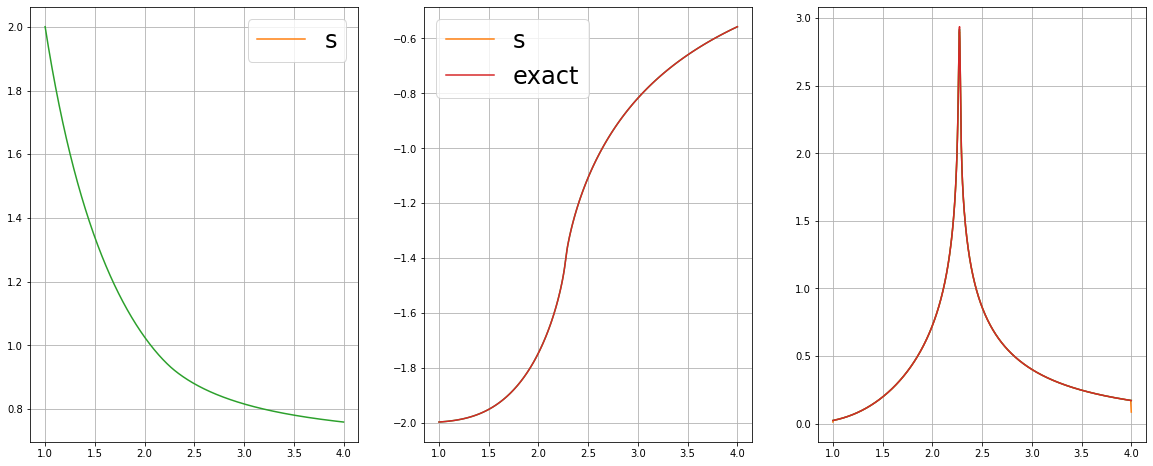

In [17]:
T = np.linspace(1, 4,1000)
K = 1/T

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
n = 256
m = n

# free energy
gamma = eval_gamma(n, K)

Z1 = eval_Z1(m,gamma)
Z2 = eval_Z2(m,gamma)
Z3 = eval_Z3(m,gamma)
Z4 = eval_Z4(m,gamma)
Z = 0.5 * (2*np.sinh(2*K))**(n*m/2) * (Z1+Z2+Z3+Z4)
Zs = Z1 + Z2 + Z3 + Z4

lnZ1 = eval_lnZ1(K, n, m, gamma)
Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K) 
lnZ = np.log(1/2) + (n*m/2)*np.log((2*np.sinh(2*K))) + lnZ1 + np.log(1+Z2_over_Z1+Z3_over_Z1+Z4_over_Z1)

# energy
Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)
sum_Z = 1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1

d_gamma = eval_d_gamma(n, K)
dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)
sum_dZ = dZ1_over_Z1 + dZ2_over_Z2*Z2_over_Z1 + dZ3_over_Z3*Z3_over_Z1 + dZ4_over_Z4*Z4_over_Z1

E_mn = -J/np.tanh(2*K) - J*sum_dZ/sum_Z/(m*n)

# specific heat
dd_gamma = eval_dd_gamma(n, K)
ddZ1_over_Z1 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
ddZ2_over_Z2 = eval_ddZ2_over_Z2(m,gamma,d_gamma,dd_gamma,K)
ddZ3_over_Z3 = eval_ddZ3_over_Z3(m,gamma,d_gamma,dd_gamma,K)
ddZ4_over_Z4 = eval_ddZ4_over_Z4(m,gamma,d_gamma,dd_gamma,K)
sum_ddZ = ddZ1_over_Z1 + ddZ2_over_Z2*Z2_over_Z1 + ddZ3_over_Z3*Z3_over_Z1 + ddZ4_over_Z4*Z4_over_Z1

C_mn = -2*K**2/np.sinh(2*K)**2 + K**2/(m*n)*(sum_ddZ/sum_Z-(sum_dZ/sum_Z)**2)

# plots
# lnZ
ax[0].plot(T, np.log(Z)/(m*n))
ax[0].plot(T, np.log(Zs)/(m*n) + np.log(0.5)/(m*n) + 0.5*np.log((2*np.sinh(2*K))) , label='s')
ax[0].plot(T, lnZ/(m*n))
ax[0].legend(fontsize=24)
ax[0].grid(True)

ax[1].plot(T, -np.gradient(np.log(Z)/(m*n),K))
ax[1].plot(T, -np.gradient(np.log(Zs)/(m*n),K) - 1/np.tanh(2*K), label='s')
ax[1].plot(T, -np.gradient(lnZ/(m*n),K))
ax[1].plot(T, E_mn, label='exact')
ax[1].legend(fontsize=24)
ax[1].grid(True)

ax[2].plot(T, np.gradient(np.gradient(np.log(Z),K),K)*(K**2)/(m*n) )
ax[2].plot(T, np.gradient(np.gradient(lnZ,K),K)*(K**2)/(m*n) )
ax[2].plot(T, np.gradient(E_mn, T) )
ax[2].plot(T, C_mn)
ax[2].grid(True)

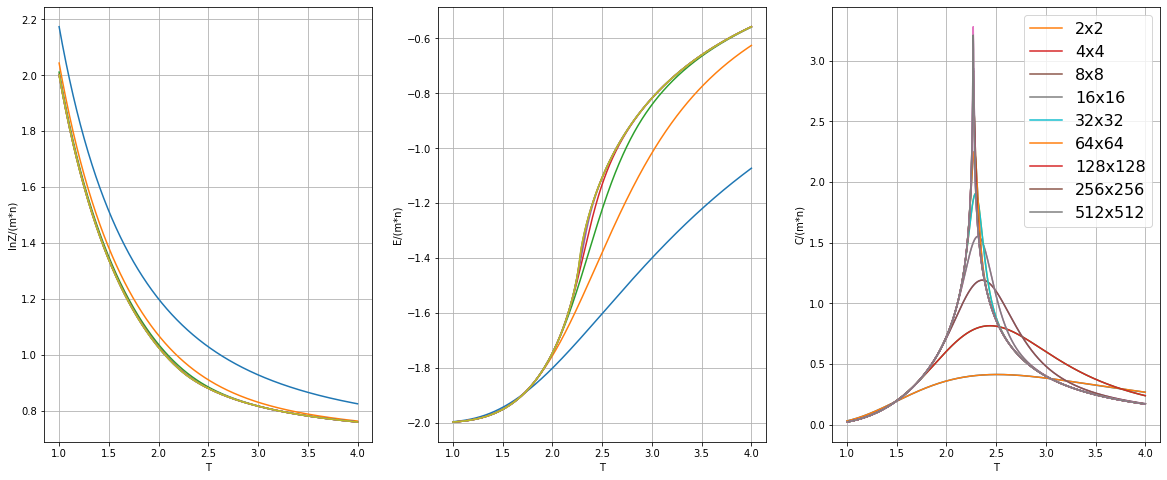

In [18]:
T = np.linspace(1, 4, 1000)
K = 1/T
E_shape = {}

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
for n in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
    m = n
    gamma = eval_gamma(n, K)

    lnZ1 = eval_lnZ1(K, n, m, gamma)
    Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
    Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
    Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K) 
    lnZ = np.log(1/2) + (n*m/2)*np.log((2*np.sinh(2*K))) + lnZ1 + np.log(1+Z2_over_Z1+Z3_over_Z1+Z4_over_Z1)

    # energy
    Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
    Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
    Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)
    sum_Z = 1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1

    d_gamma = eval_d_gamma(n, K)
    dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
    dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
    dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
    dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)
    sum_dZ = dZ1_over_Z1 + dZ2_over_Z2*Z2_over_Z1 + dZ3_over_Z3*Z3_over_Z1 + dZ4_over_Z4*Z4_over_Z1

    E_mn = -J/np.tanh(2*K) - J*sum_dZ/sum_Z/(m*n)
    
    # specific heat
    dd_gamma = eval_dd_gamma(n, K)
    ddZ1_over_Z1 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
    ddZ2_over_Z2 = eval_ddZ2_over_Z2(m,gamma,d_gamma,dd_gamma,K)
    ddZ3_over_Z3 = eval_ddZ3_over_Z3(m,gamma,d_gamma,dd_gamma,K)
    ddZ4_over_Z4 = eval_ddZ4_over_Z4(m,gamma,d_gamma,dd_gamma,K)
    sum_ddZ = ddZ1_over_Z1 + ddZ2_over_Z2*Z2_over_Z1 + ddZ3_over_Z3*Z3_over_Z1 + ddZ4_over_Z4*Z4_over_Z1

    C_mn = -2*K**2/np.sinh(2*K)**2 + K**2/(m*n)*(sum_ddZ/sum_Z-(sum_dZ/sum_Z)**2)
    
    # plots
    ax[0].plot(T, lnZ/(m*n))
    ax[0].set_xlabel('T')
    ax[0].set_ylabel('lnZ/(m*n)')
    ax[0].grid(True)
    
    ax[1].plot(T, E_mn)
#     ax[1].plot(T, -np.gradient(lnZ/(m*n),K))
    ax[1].set_xlabel('T')
    ax[1].set_ylabel('E/(m*n)')
    ax[1].grid(True)
    
    ax[2].plot(T, C_mn)
    ax[2].plot(T, np.gradient(E_mn, T), label='{:d}x{:d}'.format(m,n))
#     ax[2].plot(T, np.gradient(np.gradient(lnZ,K),K)*(K**2)/(m*n) )
    ax[2].legend(fontsize=16)
    ax[2].set_xlabel('T')
    ax[2].set_ylabel('C/(m*n)')
#     ax[2].set_ylim([0,2.5])
    ax[2].grid(True)
fig.savefig('FSS.png')

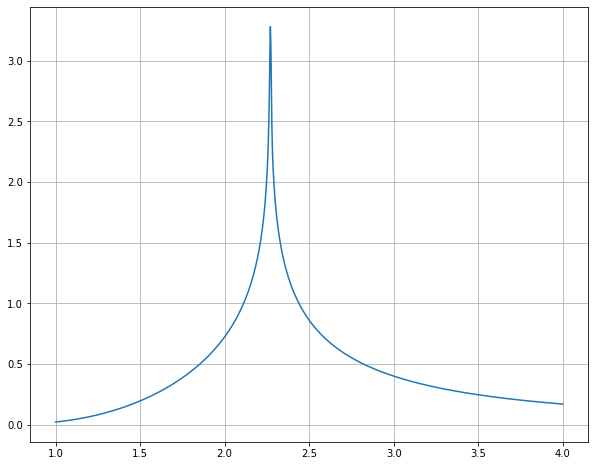

In [19]:
T = np.linspace(1, 4, 1000)
K = 1/T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
n = 512
m = n

# free energy
gamma = eval_gamma(n, K)
Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)
sum_Z = 1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1

d_gamma = eval_d_gamma(n, K)
dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)
sum_dZ = dZ1_over_Z1 + dZ2_over_Z2*Z2_over_Z1 + dZ3_over_Z3*Z3_over_Z1 + dZ4_over_Z4*Z4_over_Z1

dd_gamma = eval_dd_gamma(n, K)
ddZ1_over_Z1 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
ddZ2_over_Z2 = eval_ddZ2_over_Z2(m,gamma,d_gamma,dd_gamma,K)
ddZ3_over_Z3 = eval_ddZ3_over_Z3(m,gamma,d_gamma,dd_gamma,K)
ddZ4_over_Z4 = eval_ddZ4_over_Z4(m,gamma,d_gamma,dd_gamma,K)
sum_ddZ = ddZ1_over_Z1 + ddZ2_over_Z2*Z2_over_Z1 + ddZ3_over_Z3*Z3_over_Z1 + ddZ4_over_Z4*Z4_over_Z1

# specific heat
C_mn = -2*K**2/np.sinh(2*K)**2 + K**2/(m*n)*(sum_ddZ/sum_Z-(sum_dZ/sum_Z)**2)

ax.plot(T, C_mn)
ax.grid(True)

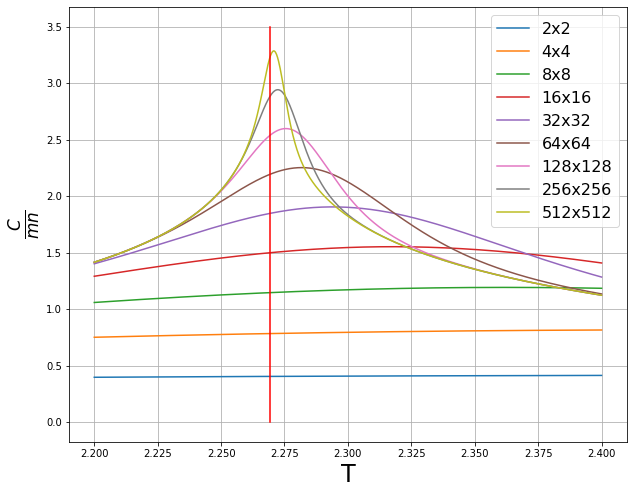

In [20]:
T = np.linspace(2.2, 2.4, 1000)
K = 1/T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
for n in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
    m = n

    # free energy
    gamma = eval_gamma(n, K)
    Z2_over_Z1 = eval_Z2_over_Z1(m,gamma,K)
    Z3_over_Z1 = eval_Z3_over_Z1(m,gamma,K)
    Z4_over_Z1 = eval_Z4_over_Z1(m,gamma,K)
    sum_Z = 1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1

    d_gamma = eval_d_gamma(n, K)
    dZ1_over_Z1 = eval_dZ1_over_Z1(m,gamma,d_gamma,K)
    dZ2_over_Z2 = eval_dZ2_over_Z2(m,gamma,d_gamma,K)
    dZ3_over_Z3 = eval_dZ3_over_Z3(m,gamma,d_gamma,K)
    dZ4_over_Z4 = eval_dZ4_over_Z4(m,gamma,d_gamma,K)
    sum_dZ = dZ1_over_Z1 + dZ2_over_Z2*Z2_over_Z1 + dZ3_over_Z3*Z3_over_Z1 + dZ4_over_Z4*Z4_over_Z1

    dd_gamma = eval_dd_gamma(n, K)
    ddZ1_over_Z1 = eval_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma,K)
    ddZ2_over_Z2 = eval_ddZ2_over_Z2(m,gamma,d_gamma,dd_gamma,K)
    ddZ3_over_Z3 = eval_ddZ3_over_Z3(m,gamma,d_gamma,dd_gamma,K)
    ddZ4_over_Z4 = eval_ddZ4_over_Z4(m,gamma,d_gamma,dd_gamma,K)
    sum_ddZ = ddZ1_over_Z1 + ddZ2_over_Z2*Z2_over_Z1 + ddZ3_over_Z3*Z3_over_Z1 + ddZ4_over_Z4*Z4_over_Z1

    # specific heat
    C_mn = -2*K**2/np.sinh(2*K)**2 + K**2/(m*n)*(sum_ddZ/sum_Z-(sum_dZ/sum_Z)**2)

    ax.plot(T, C_mn, label='{:d}x{:d}'.format(m,n))

ax.plot([Tc, Tc], [0, 3.5], 'r')
ax.grid(True)
ax.legend(fontsize=16)
ax.set_xlabel(r'T', fontsize=24)
ax.set_ylabel(r'$\frac{C}{mn}$', fontsize=24)
fig.savefig('C_mn.png')